In [49]:
import pandas as pd
import matplotlib.pyplot as plt




In [68]:
YEARS = [2024, 2024]
POSITIONS = [1, 5]

with open("/Users/benjesty/projects/f1-stats/query_results/rolling_championship.csv", "r") as f:
    rc_full = pd.read_csv(f)

rc_full = rc_full.sort_values(["start_race_year", "start_race_round", "points"], ascending=[True, True, False])

# rc_full[rc_full["driver_name"]]
rc_full = rc_full[
    (rc_full["end_race_year"] >= YEARS[0]) 
    & (rc_full["end_race_year"] <= YEARS[1]) 
    & (rc_full["position"] >= POSITIONS[0]) 
    & (rc_full["position"] <= POSITIONS[1])
]

drivers = rc_full["driver_name"].unique()
races = rc_full[["end_race_year", "end_race_round", "end_race_name"]].drop_duplicates()

races

,end_race_year,end_race_round,end_race_name
497,2024,1,Bahrain Grand Prix
475,2024,2,Saudi Arabian Grand Prix
453,2024,3,Australian Grand Prix
431,2024,4,Japanese Grand Prix
410,2024,5,Chinese Grand Prix
389,2024,6,Miami Grand Prix
368,2024,7,Emilia Romagna Grand Prix
347,2024,8,Monaco Grand Prix
326,2024,9,Canadian Grand Prix
305,2024,10,Spanish Grand Prix


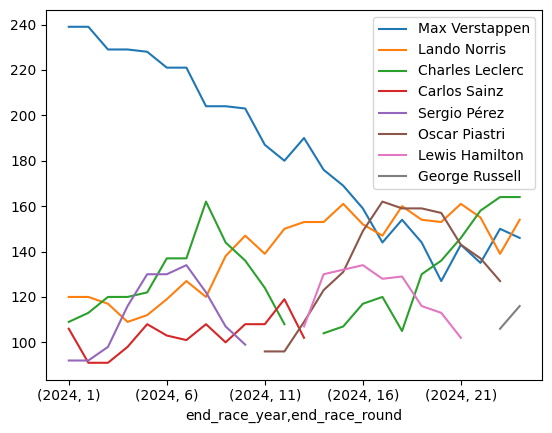

In [69]:
inds = pd.MultiIndex.from_frame(races[["end_race_year", "end_race_round"]])

df = pd.DataFrame(data=None, index=inds, columns=drivers)

for _, row in rc_full.iterrows():
    df.at[(row["end_race_year"], row["end_race_round"]), row["driver_name"]] = row["points"]

fig = df.plot()
fig.legend(bbox_to_anchor=(1,1))
plt.show()